In [85]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [86]:
mnist=tf.keras.datasets.mnist

In [14]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [15]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


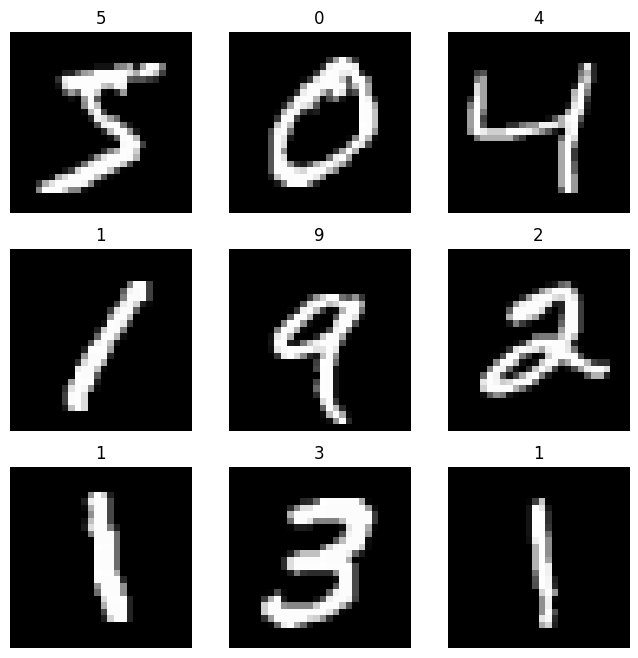

In [16]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')

    
    

In [6]:
# import matplotlib.pyplot as plt
# import numpy as np

# x = np.linspace(0, 10, 100)
# y = np.tan(x)

# plt.plot(x, y, label="Sine Wave")
# plt.xlabel("X-axis")
# plt.ylabel("Y-axis")
# plt.legend()
# plt.show()

In [ ]:
x_train=tf.keras.utils.normalize(x_train)
x_test=tf.keras.utils.normalize(x_test)

Building **Model** 

In [25]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [30]:
model.fit(x_train,y_train,validation_data=(x_test,y_test), batch_size=32, epochs=15)

Epoch 1/15


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8499 - loss: 0.5154 - val_accuracy: 0.9582 - val_loss: 0.1432
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9627 - loss: 0.1215 - val_accuracy: 0.9658 - val_loss: 0.1145
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9743 - loss: 0.0809 - val_accuracy: 0.9716 - val_loss: 0.0902
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9830 - loss: 0.0553 - val_accuracy: 0.9714 - val_loss: 0.0892
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9855 - loss: 0.0460 - val_accuracy: 0.9713 - val_loss: 0.0972
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9888 - loss: 0.0350 - val_accuracy: 0.9744 - val_loss: 0.0908
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9903 - loss: 0.0304 - val_accuracy: 0.9769 - val_loss: 0.0881
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9918 - loss: 0.0248 - val_accurac

In [87]:
 import cv2

In [74]:
image=cv2.imread('0.jpg')[:,:,0]
image=np.invert(np.array([image]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
0


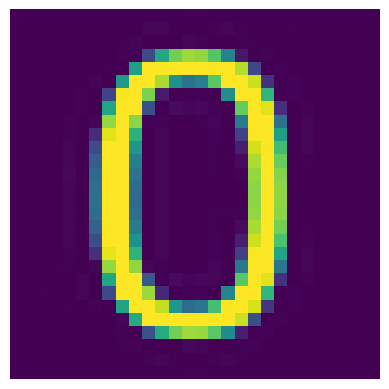

In [89]:
output=model.predict(image)
plt.imshow(image[0])
plt.axis('off')
print(np.argmax(output))

In [88]:
model.save('HandwrittenImageRecognition.keras')